## _*Comparing Strings with Quantum Superpositon*_ 

The latest version of this notebook is available on https://github.com/QISKit/qiskit-tutorial.

For more information about how to use the IBM Q Experience (QX), consult the [tutorials](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=c59b3710b928891a1420190148a72cce&pageIndex=0), or check out the [community](https://quantumexperience.ng.bluemix.net/qstage/#/community).

**WARNING**: this must be done at the `_initializer.py`
```
def reapply(self, circ):
        """Reapply this gate to the corresponding qubits in circ."""
        #self._modifiers(circ.initialize(self.name, self.param, self.arg)) #modified by RRHP on May 1, 2018
        self._modifiers(circ.initialize(self.param, self.arg))
```

***
### Contributors
Rudy Raymond

We know that a qubit can be in a superposition of two basis states: "0" and "1" at the same time. Going further, two qubits can be in a superposition of four basis states: "00", "01", "10", and "11". In general, $n$ qubits can be in a superposition of $2^n$ basis states. 

Here, we show a simple example to create quantum superpositon for bitstrings and use them to compare the similarity between two bitstrings. This tutorial makes use the [quantum state initialization function](https://nbviewer.jupyter.org/github/QISKit/qiskit-tutorial/blob/master/reference/tools/quantum_gates_and_linear_algebra.ipynb#Arbitrary-initialization). It also illustrates the power of loading data into quantum states. 

In [1]:
#To prepare the programming environment

# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import QuantumProgram
from qiskit.backends import discover_local_backends, discover_remote_backends
from qiskit.tools.visualization import circuit_drawer

## Comparing bitstrings of length 4 with 3 qubits

Let say we have three bitstrings $s_1$, $s_2$, and $s_3$ as below.

\begin{eqnarray}
s_1 &\equiv& 0000 \\
s_2 &\equiv& 0100 \\
s_3 &\equiv& 1111 \\
\end{eqnarray}

We can see that the bitstrings $s_1$ and $s_2$ are close: they are different at the second position from the left. Similarly, we observe that $s_3$ is different from $s_1$ and $s_2$ at at least three locations. Thus, with regards to $s_1$, we can conlude that $s_2$ is closer than $s_3$. 

Using quantum superpositon and measurement, one can obtain a similar conclusion. Let use three qubits to encode the above bitstrings: the first two qubits for indexing the location in the bistring (in binary), and the last qubit for the content of the bistring. Namely, with regards to $s_1$, $s_2$, and $s_3$, we can create the corresponding quantum states $|q_1\rangle$, $|q_2\rangle$, and $|q_3\rangle$, respectively:

\begin{eqnarray}
|q_1 \rangle &=& \frac{1}{2} \left( |00\rangle |0\rangle +  |01\rangle |0\rangle + |10\rangle |0\rangle + |11\rangle |0\rangle \right) \\
|q_2 \rangle &=& \frac{1}{2} \left( |00\rangle |0\rangle +  |01\rangle |1\rangle + |10\rangle |0\rangle + |11\rangle |0\rangle \right) \\
|q_3 \rangle &=& \frac{1}{2} \left( |00\rangle |1\rangle +  |01\rangle |1\rangle + |10\rangle |1\rangle + |11\rangle |1\rangle \right)
\end{eqnarray}

### Creating quantum superposition for bitstrings

Notice that the second register (from the left) of each quantum state holds the content of the bit in the corresponding bistring. Those quantum states can be easily created with the `initialize()` function of QISKit, as below.

In [2]:
qp = QuantumProgram()
q = qp.create_quantum_register("q", 3)
#c = qp.create_quantum_register("c", 3)
mainCircuit = qp.create_circuit("main", [q])
def encode_bitstring(bitstring, q):
    #create a circuit for representing the bitstring in a quantum superposition
    n = math.ceil(math.log2(len(bitstring))) + 1
    #print("n=", n)
    assert n > 2, "the length of bitstring must be at least 2"
    #q = QuantumRegister("q", n)
    #c = ClassicalRegister("c", n)
    qc = qp.create_circuit(bitstring, [q])
    desired_vector = np.array([ 0.0 for i in range(2**n) ])
    amplitude = np.sqrt(1.0/2**(n-1))
    
    for i, b in enumerate(bitstring):
        pos = i * 2
        if b == "1":
            pos += 1
        desired_vector[pos] = amplitude
    #print("desired vector = ", desired_vector)
    qc.initialize(desired_vector, [ q[i] for i in range(n) ] )
    qc.barrier(q)
    return qc

We can now create quantum circuits to create the quantum states $|q_1\rangle$, $|q_2\rangle$, and $|q_3\rangle$.

quantum circuit for bitstring  0000


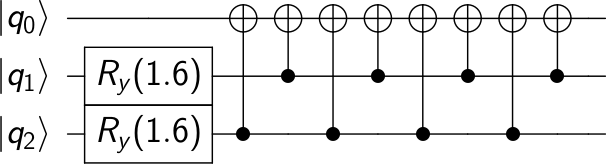

In [3]:
s1 = "0000"
qc_for_q1 = encode_bitstring(s1, q)
print("quantum circuit for bitstring ", s1)
circuit_drawer(qc_for_q1)

quantum circuit for bitstring  0100


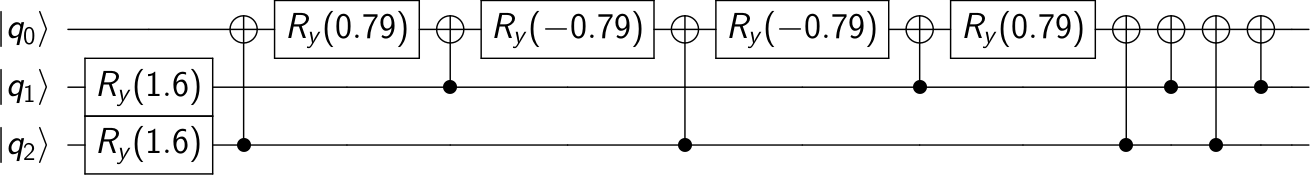

In [4]:
s2 = "0100"
qc_for_q2 = encode_bitstring(s2, q)
print("quantum circuit for bitstring ", s2)
circuit_drawer(qc_for_q2)

quantum circuit for bitstring  1111


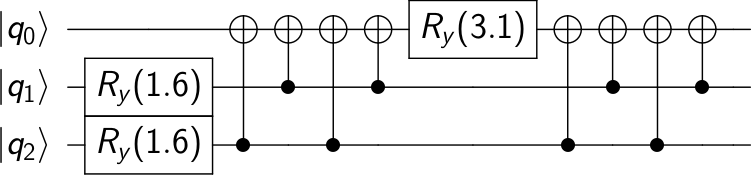

In [5]:
s3 = "1111"
qc_for_q3 = encode_bitstring(s3, q)
print("quantum circuit for bitstring ", s3)
circuit_drawer(qc_for_q3)

### Reversing quantum circuit

We can easily reverse a quantum circuit using the `reverse()` function.

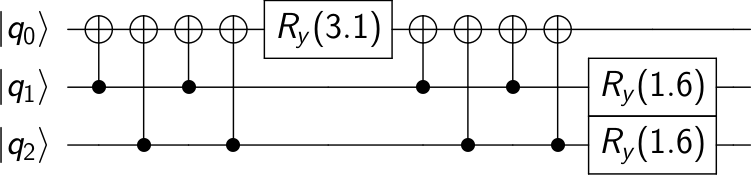

In [6]:
#inversing the quantum circuit that initializes q3
circuit_drawer(qc_for_q3.reverse())

### Comparing bitsrings

We can now compare how close $s_1$ to $s_2$, and $s_1$ to $s_3$ by using the quantum circuits for the quantum states $|q_1\rangle$, $|q_2\rangle$, and $|q_3\rangle$ and their reverse. 

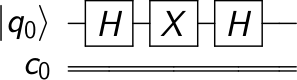

In [7]:
qp = QuantumProgram()
q = qp.create_quantum_register("q", 1)
c = qp.create_classical_register("c", 1)
qc1 = qp.create_circuit("H1", [q], [c])
qc1.h(q)

qc2 = qp.create_circuit("H2", [q], [c])
qc2.x(q)
qc2.h(q)

qp.add_circuit("H1_and_H2", qc1 + qc2) 
circuit_drawer(qp.get_circuit("H1_and_H2"))

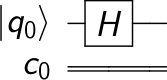

In [8]:
circuit_drawer(qc1)

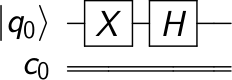

In [9]:
circuit_drawer(qc2)

In [17]:
from qiskit.tools.visualization import plot_histogram

qp = QuantumProgram()
q = qp.create_quantum_register("q", 1)
c = qp.create_classical_register("c", 1)
qc1Error = qp.create_circuit("H1", [q], [c])
qc1Error.initialize([1.0/np.sqrt(2), 1.0/np.sqrt(2)], [ q[0] ]).inverse() #I can inverse the initialization!!!
qc1Error.x(q)

qc2Error = qp.create_circuit("H2", [q], [c])
qc2Error.initialize([1.0/np.sqrt(2), -1.0/np.sqrt(2)], [ q[0] ])
qc2Error.h(q)

qp.add_circuit("H1_and_H2", qc1Error + qc2Error) 


## set up program
#qp1 = QuantumProgram()
#
#qp1.add_circuit("s1_and_s3", qc_for_q1 + qc_for_q3)
#
#qp2 = QuantumProgram()
#qp2.add_circuit("s2", qc_for_q2)
#
#qp3 = QuantumProgram()
#qp3.add_circuit("s3", qc_for_q3)
#
#backend = "local_qiskit_simulator" 
#shots_sim = 1000
#
#qp = QuantumProgram()
#qp.add_circuit("s1_barrier_s1", qp1 + qp2)
#results_sim = qp.execute(["s1_barrier_s1"], backend=backend, shots = shots_sim)
#stats_sim = results_sim.get_counts("s1_barrier_s1")
#
#plot_histogram(stats_sim)

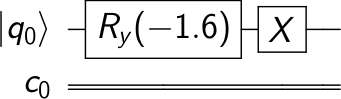

In [18]:
circuit_drawer(qc1Error)

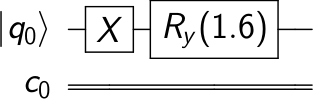

In [14]:
circuit_drawer(qc1Error.reverse())

In [15]:
circuit_drawer(qc1Error)

AttributeError: 'QuantumCircuit' object has no attribute 'inverse'

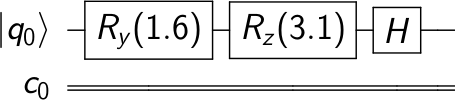

In [12]:
circuit_drawer(qc2Error)

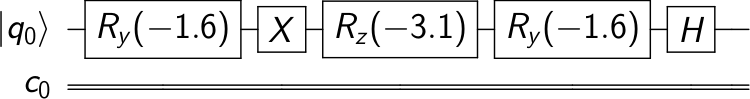

In [13]:
circuit_drawer(qp.get_circuit("H1_and_H2"))

The above results in *stats* tell us how many times each bit string was found as a result. To make our emoticon, we convert the bit strings into ASCII characters. We also calculate the fraction of shots for which each result occurred. The most common results are then printed to screen.

This gives us a list of characters and probabilities. But that isn't very fun. For something more visual, we use matplotlib to create an image in which the all the characters included in the result are printed on top of each other. The alpha channel of each character is set to the fraction of shots for which that result occurred. For our simulator results, this is approximately equally split between 8) and ;).

We will write this transformation and visualization from results to ASCII characters as a function, so we can reuse it later when we run the smiley circuit on the *ibmqx5* device. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='monospace')

def plot_smiley (stats, shots):
    for bitString in stats:
        char = chr(int( bitString[0:8] ,2)) # get string of the leftmost 8 bits and convert to an ASCII character
        char += chr(int( bitString[8:16] ,2)) # do the same for string of rightmost 8 bits, and add it to the previous character
        prob = stats[bitString] / shots # fraction of shots for which this result occurred
        # create plot with all characters on top of each other with alpha given by how often it turned up in the output
        plt.annotate( char, (0.5,0.5), va="center", ha="center", color = (0,0,0, prob ), size = 300)
        if (prob>0.05): # list prob and char for the dominant results (occurred for more than 5% of shots)
            print(str(prob)+"\t"+char)
    plt.axis('off')
    plt.show()
    
plot_smiley(stats_sim, shots_sim)

We'll now run the smiley circuit on *ibmqx5*, after checking that the device is online. Given the noise on the device, our smiley won't be as clean as our previous run on the simulator.

In [ ]:
backend = "ibmqx5"

if get_backend_instance(backend).status["available"] is True:
    shots_device = 1000
    results_device = qp.execute(["smiley_writer"], backend=backend, shots=shots_device, wait=5, timeout=300)
    stats_device = results_device.get_counts("smiley_writer")
    plot_smiley(stats_device, shots_device)

And there you have it. A program to take one of the world's most advanced devices and made a smiley with it. A quantum smiley!

An alternative introduction to this program can be found [here](https://medium.com/@decodoku/making-a-quantum-computer-smile-cee86a6fc1de).

In [ ]:
print("Installed packages are as the following")
!python --version
print()
!conda list 'qiskit|IBMQuantumExperience|numpy|scipy|matplotlib'